In [1]:
!pip install deberta

     |████████████████████████████████| 64 kB 2.2 MB/s 
     |████████████████████████████████| 45 kB 3.1 MB/s 
     |████████████████████████████████| 1.2 MB 9.0 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16180 sha256=a0383161ab98986a3c78d9d91b2ff5730b36cdc7bdca04bfdb87a290a63de2b3
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b19e3158dce26a20a1c86b3533c43ec72a549fd7
Successfully built seqeval


In [2]:
! pip install sentencepiece

In [3]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 4.3 MB/s 
     |████████████████████████████████| 77 kB 7.8 MB/s 
     |████████████████████████████████| 6.6 MB 73.9 MB/s 
     |████████████████████████████████| 596 kB 55.8 MB/s 
     |████████████████████████████████| 880 kB 86.0 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=c77593dcf65ffb289c4ee997622957629256386fe977ec2b349ba01409f21acd
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/MyDrive/505_Final_project/'

Mounted at /content/drive


In [4]:
import pandas as pd
#df_rte_train = pd.read_csv(filepath+'rte_train.csv')

**Load and process Train data for both eng and spanish**

In [5]:

f=open(filepath+'train/crawler/data/spanish/tweet_by_ID_30_4_2022__02_47_48.txt.text')
docs_span=f.read()
text_lst_span = docs_span.split("\n")

In [6]:
f=open(filepath+'train/crawler/data/spanish/tweet_by_ID_30_4_2022__02_47_48.txt.labels')
labels_span=f.read()
labels_lst_span = labels_span.split("\n")

In [7]:
f=open(filepath+'train/crawler/data/english/tweet_by_ID_30_4_2022__04_17_45.txt.text')
docs_eng=f.read()
text_lst_eng = docs_eng.split("\n")

In [8]:
f=open(filepath+'train/crawler/data/english/tweet_by_ID_30_4_2022__04_17_45.txt.labels')
labels_eng=f.read()
labels_lst_eng = labels_eng.split("\n")

In [9]:
labels_lst_span = labels_lst_span[:-1]
text_lst_span = text_lst_span[:-1]
labels_lst_eng = labels_lst_eng[:-1]
text_lst_eng = text_lst_eng[:-1]

In [10]:
import numpy as np
print(len(text_lst_span),len(labels_lst_span),len(text_lst_eng),len(labels_lst_eng))

81165 81165 385275 385275


In [11]:
import pandas as pd
df_data_span = pd.DataFrame(list(zip(text_lst_span, labels_lst_span)),
               columns =['Text', 'Label'])

**new mappings of spanish**
0-0
1-1
2-2
3-3
4-5
5-9
6-20
7-14
8-21
9-22
10-6
11-8
12-13
13-19
14-23
15-7
16-24
17-25
18-16

In [ ]:
def mod_span_label(df_data_span):
  df_data_span.loc[df_data_span['Label'] == 4, 'Label'] = 5
  df_data_span.loc[df_data_span['Label'] == 5, 'Label'] = 9
  df_data_span.loc[df_data_span['Label'] == 6, 'Label'] = 20
  df_data_span.loc[df_data_span['Label'] == 7, 'Label'] = 14
  df_data_span.loc[df_data_span['Label'] == 8, 'Label'] = 21
  df_data_span.loc[df_data_span['Label'] == 9, 'Label'] = 22
  df_data_span.loc[df_data_span['Label'] == 10, 'Label'] = 6
  df_data_span.loc[df_data_span['Label'] == 11, 'Label'] = 8
  df_data_span.loc[df_data_span['Label'] == 12, 'Label'] = 13
  df_data_span.loc[df_data_span['Label'] == 13, 'Label'] = 19
  df_data_span.loc[df_data_span['Label'] == 14, 'Label'] = 23
  df_data_span.loc[df_data_span['Label'] == 15, 'Label'] = 7
  df_data_span.loc[df_data_span['Label'] == 16, 'Label'] = 24
  df_data_span.loc[df_data_span['Label'] == 17, 'Label'] = 25
  df_data_span.loc[df_data_span['Label'] == 18, 'Label'] = 16

  return df_data_span

In [ ]:
df_data_span

,Text,Label
0,Es imposible quererte más @ Plaza Del Callao -...,0
1,Disfrutando de buena comida con buena compañía...,4
2,Muchísimas Felicidades M!!! Nos vemos pronto! ...,11
3,Y pensar que a esta persona la conozco de hace...,11
4,¡Que buenas son las noches así y que buena com...,17
...,...,...
81160,Cena en Madrid. Plan perfecto para descansar d...,1
81161,Cuando este triste miraré esta batalla de gall...,2
81162,@user cooooomoooo me hueeeeeleeeee a olviiiido...,5
81163,Mi amor @ Bar Concha Velasco Almendralejo,0


In [ ]:
df_data_span = mod_span_label(df_data_span)

In [ ]:
df_data_span

,Text,Label
0,Es imposible quererte más @ Plaza Del Callao -...,0
1,Disfrutando de buena comida con buena compañía...,4
2,Muchísimas Felicidades M!!! Nos vemos pronto! ...,11
3,Y pensar que a esta persona la conozco de hace...,11
4,¡Que buenas son las noches así y que buena com...,17
...,...,...
81160,Cena en Madrid. Plan perfecto para descansar d...,1
81161,Cuando este triste miraré esta batalla de gall...,2
81162,@user cooooomoooo me hueeeeeleeeee a olviiiido...,5
81163,Mi amor @ Bar Concha Velasco Almendralejo,0


In [12]:
import pandas as pd
df_data_eng = pd.DataFrame(list(zip(text_lst_eng, labels_lst_eng)),
               columns =['Text', 'Label'])

In [13]:
df_data_eng

,Text,Label
0,Step out and explore. # ️ @ Ellis Island Cafe,0
1,@user @ Cathedral Preparatory School,18
2,RuPaul's Drag Race bingo fun. Drag Queens be S...,9
3,Black History like a Mufffffaaaaaka #blacchyna...,2
4,@ BJ's Restaurant and Brewhouse,8
...,...,...
385270,Couldn't be more stoked to see mama tayblazesc...,9
385271,Dinner indian food (@ Bombay Curry in Melbourne),1
385272,'Tis the season @ Starbucks,17
385273,We voted! #election2016 #vote #proudtobeanamer...,11


In [14]:
df_data_eng.Label.unique().size

20

In [15]:
# Get the lists of sentences and their labels.
rte_train_sentences = df_data_eng.Text.values
rte_train_labels = df_data_eng.Label.values.astype(int)

In [ ]:
rte_train_sentences

array(['Step out and explore. # ️ @ Ellis Island Cafe ',
       '@user @ Cathedral Preparatory School ',
       "RuPaul's Drag Race bingo fun. Drag Queens be SEXY! #rupaulsdragrace @user abwyman #la… ",
       ..., "'Tis the season @ Starbucks ",
       'We voted! #election2016 #vote #proudtobeanamerican #USA @ Brushy Creek Baptist Church ',
       "Retired Jerseys, where's Chris Webber's jersey???? @ Crisler… "],
      dtype=object)

In [ ]:
rte_train_labels.size

385275

**Load and process test data**

In [19]:
f=open(filepath+'test/us_test.text')
docs_test_eng=f.read()
text_test_eng = docs_test_eng.split("\n")

In [20]:
f=open(filepath+'test/us_test.labels')
labels_test_eng=f.read()
labels_test_eng = labels_test_eng.split("\n")

In [21]:
labels_test_eng = labels_test_eng[:-1]
text_test_eng = text_test_eng[:-1]

In [22]:
import pandas as pd
df_test_eng = pd.DataFrame(list(zip(text_test_eng, labels_test_eng)),
               columns =['Text', 'Label'])

In [23]:
df_test_eng

,Text,Label
0,en Pelham Parkway,2
1,The calm before...... | w/ sofarsounds @user |...,10
2,Just witnessed the great solar eclipse @ Tampa...,6
3,This little lady is 26 weeks pregnant today! E...,1
4,"Great road trip views! @ Shartlesville, Pennsy...",16
...,...,...
49995,@user @user @user #la #westhollywood #dtboy #l...,5
49996,Climbing subway stairs. That was nothing. #sta...,19
49997,Pops with Ms Drina at The Swanees Anniversary ...,6
49998,"We love ️ Soren! July 26, 2017 was her first d...",0


In [24]:
# Get the lists of sentences and their labels.
rte_test_sentences = df_test_eng.Text.values
rte_test_labels = df_test_eng.Label.values.astype(int)

**Start training**

**Tokenizer**
We load the tokenizer using autotokenizer here but the same can be done using 'DebertaV2Tokenizer'. When you are using the second one, we need to install sentence pipe before installing transformers to avoid errors.

In [18]:
from transformers import AutoTokenizer
from transformers import DebertaV2Tokenizer, DebertaV2ForSequenceClassification
import torch
checkpoint = 'microsoft/mdeberta-v3-base'
#tokenizer_mdeberta = DebertaV2Tokenizer.from_pretrained(checkpoint) #can use either
tokenizer_mdeberta = AutoTokenizer.from_pretrained(checkpoint, do_lower_case=True)

Downloading:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/579 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.11M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
max_len = 0

# For every sentence...
for sent1 in rte_train_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer_mdeberta.encode(sent1, add_special_tokens=True)
    #print(sent1,sent2)
    #print(input_ids)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  76


In [17]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


**Preprocessing**
Here we used the sentence max length as 150 since the tweets we use for training are from 2015-2017 when twitter character limit was 140. To ensure no truncation is done even after adding the special tokens, a max length of 150 is chosen. Not all models output token_type_ids.(check for the model attributes before running).

In [16]:
import torch
def process_trainingdata(tokenizer,training_set,train_labels):
  # Tokenize all of the sentences and map the tokens to thier word IDs.
  input_ids = []
  attention_masks = []
  token_type_ids=[]

  # For every sentence...
  for sent1 in training_set:
    encoded_dict = tokenizer(
                        sent1,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 150,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])
    token_type_ids.append(encoded_dict['token_type_ids'])

  # Convert the lists into tensors.
  input_ids = torch.cat(input_ids, dim=0)
  attention_masks = torch.cat(attention_masks, dim=0)
  token_type_ids = torch.cat(token_type_ids, dim=0)
  labels = torch.tensor(train_labels)

  # Print sentence 0, now as a list of IDs.
  print('Original: ', training_set[0])
  print('Token IDs:', input_ids[0])
  #print('Toke type ids:', token_type_ids[0])
  return input_ids,attention_masks,labels

In [ ]:
input_ids_mdeberta,attention_masks_mdeberta,labels_mdeberta = process_trainingdata(tokenizer_mdeberta,rte_train_sentences,rte_train_labels)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  Step out and explore. # ️ @ Ellis Island Cafe 
Token IDs: tensor([     1,  14461,   1351,    306,  39057,    261,    388,    260,   4668,
          1251,    260, 140494,  43892,  29287,      2,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,    

In [15]:
from torch.utils.data import TensorDataset, random_split

def datasetsize(input_ids, attention_masks, labels):
  dataset = TensorDataset(input_ids, attention_masks, labels)

  train_size = int(0.9 * len(dataset))
  val_size = len(dataset) - train_size

  train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

  print('{:>5,} training samples'.format(train_size))
  print('{:>5,} validation samples'.format(val_size)) 
  return train_dataset,val_dataset

In [ ]:
train_dataset_mdeberta,val_dataset_mdeberta = datasetsize(input_ids_mdeberta,attention_masks_mdeberta,labels_mdeberta)

346,747 training samples
38,528 validation samples


In [14]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
def dataloader(size,train_dataset,val_dataset):
  batch_size = size
 
  train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size, # Trains with this batch size.
            drop_last=True
        )
  validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size, # Evaluate with this batch size.
            drop_last=True
        )
  return train_dataloader, validation_dataloader

In [ ]:
train_dataloader_mdeberta, validation_dataloader_mdeberta = dataloader(32,train_dataset_mdeberta,val_dataset_mdeberta)

In [ ]:
print(len(train_dataloader_mdeberta.dataset))

346747


** Used to load data if model fails during checkpoints**

In [ ]:
##save data loader for checkpoint
torch.save(train_dataloader_mdeberta, filepath+'train_dataloader_mdeberta.pt')
torch.save(validation_dataloader_mdeberta, filepath+'validation_dataloader_mdeberta.pt')

** Added to be able to print detailed error message when using cuda**

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

** The training is done on a consolidated 26 labels to be able to predict zero shot performance as both spanish and englisg has varrying labels**

In [ ]:
from transformers import AutoConfig, AutoModelForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model_mdeberta = AutoModelForSequenceClassification.from_pretrained(
#model_mdeberta = DebertaV2ForSequenceClassification.from_pretrained(
    "microsoft/mdeberta-v3-base", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 26, # need to change to the number of label in test for zero-shot performance
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.

)

# Tell pytorch to run this model on the GPU.
model_mdeberta.cuda()

Downloading:   0%|          | 0.00/534M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/mdeberta-v3-base were not used when initializing DebertaV2ForSequenceClassification: ['mask_predictions.LayerNorm.weight', 'mask_predictions.dense.bias', 'mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.classifier.weight', 'mask_predictions.dense.weight', 'mask_predictions.classifier.bias', 'lm_predictions.lm_head.LayerNorm.bias', 'lm_predictions.lm_head.bias', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.dense.weight']
- This IS expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from 

DebertaV2ForSequenceClassification(
  (deberta): DebertaV2Model(
    (embeddings): DebertaV2Embeddings(
      (word_embeddings): Embedding(251000, 768, padding_idx=0)
      (LayerNorm): LayerNorm((768,), eps=1e-07, elementwise_affine=True)
      (dropout): StableDropout()
    )
    (encoder): DebertaV2Encoder(
      (layer): ModuleList(
        (0): DebertaV2Layer(
          (attention): DebertaV2Attention(
            (self): DisentangledSelfAttention(
              (query_proj): Linear(in_features=768, out_features=768, bias=True)
              (key_proj): Linear(in_features=768, out_features=768, bias=True)
              (value_proj): Linear(in_features=768, out_features=768, bias=True)
              (pos_dropout): StableDropout()
              (dropout): StableDropout()
            )
            (output): DebertaV2SelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-07, elementwise_affine=True)
 

In [33]:
def optimizer(model):
  optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )
  return optimizer

In [ ]:
optimizer_mdeberta = optimizer(model_mdeberta)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [32]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
def scheduler(train_dataloader,optimizer):
  epochs = 1

  # Total number of training steps is [number of batches] x [number of epochs]. 
  # (Note that this is not the same as the number of training samples).
  total_steps = len(train_dataloader) * epochs
  #print(train_dataloader.size())

  # Create the learning rate scheduler.
  scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps) 
  return scheduler

In [ ]:
scheduler_mdeberta = scheduler(train_dataloader_mdeberta,optimizer_mdeberta)

In [30]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [29]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [31]:
import random
import numpy as np

def modeltraining(model,train_dataloader,validation_dataloader,optimizer,scheduler):

  seed_val = 42

  random.seed(seed_val)
  np.random.seed(seed_val)
  torch.manual_seed(seed_val)
  torch.cuda.manual_seed_all(seed_val)

  training_stats = []

  total_t0 = time.time()
  epochs = 2

  #with torch.no_grad():
  for epoch_i in range(0, epochs):

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()

    total_train_loss = 0
    model.train()
    #print('reached here')

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):
        if step % 1000 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        #print(b_input_ids.size(),b_labels.size())

        model.zero_grad()        
        #print('reached 1')
        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        total_train_loss += loss.item()

        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()

        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    print("")
    print("Running Validation...")

    t0 = time.time()

    model.eval()

    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    for batch in validation_dataloader:        
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        with torch.no_grad():        
            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        loss = result.loss
        
        logits = result.logits
            
        total_eval_loss += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

  print("")
  print("Training complete!")

  print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))
  return model

In [ ]:
model_mdeberta = modeltraining(model_mdeberta,train_dataloader_mdeberta,validation_dataloader_mdeberta,optimizer_mdeberta,scheduler_mdeberta)


======== Epoch 1 / 1 ========
Training...
  Batch    40  of  10,835.    Elapsed: 0:00:49.
  Batch    80  of  10,835.    Elapsed: 0:01:42.
  Batch   120  of  10,835.    Elapsed: 0:02:36.
  Batch   160  of  10,835.    Elapsed: 0:03:29.
  Batch   200  of  10,835.    Elapsed: 0:04:22.
  Batch   240  of  10,835.    Elapsed: 0:05:15.
  Batch   280  of  10,835.    Elapsed: 0:06:08.
  Batch   320  of  10,835.    Elapsed: 0:07:02.
  Batch   360  of  10,835.    Elapsed: 0:07:56.
  Batch   400  of  10,835.    Elapsed: 0:08:49.
  Batch   440  of  10,835.    Elapsed: 0:09:42.
  Batch   480  of  10,835.    Elapsed: 0:10:35.
  Batch   520  of  10,835.    Elapsed: 0:11:28.
  Batch   560  of  10,835.    Elapsed: 0:12:21.
  Batch   600  of  10,835.    Elapsed: 0:13:15.
  Batch   640  of  10,835.    Elapsed: 0:14:16.
  Batch   680  of  10,835.    Elapsed: 0:15:09.
  Batch   720  of  10,835.    Elapsed: 0:16:03.
  Batch   760  of  10,835.    Elapsed: 0:16:57.
  Batch   800  of  10,835.    Elapsed: 0:17:5

In [ ]:
torch.save(model_mdeberta,filepath+'model_mdeberta_eng_final_retrained.pt')

In [ ]:
#Clear CUDA cache
import gc

gc.collect()

torch.cuda.empty_cache()

In [41]:
#retrained again for 2 epochs
model_mdeberta_eng = torch.load(filepath+'model_mdeberta_eng_final.pt')

** Preprocess eng test and predict using fine-tuned english mdeberta**

In [25]:
import pandas as pd
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

def test_preprocessing(test_sentences,test_labels, tokenizer, batchsize,maxlength):
  input_ids_test,attention_masks_test,labels_test = process_trainingdata(tokenizer,test_sentences,test_labels)

  # Set the batch size.  
  batch_size = batchsize 

  # Create the DataLoader.
  prediction_data = TensorDataset(input_ids_test, attention_masks_test, labels_test)
  prediction_sampler = SequentialSampler(prediction_data)
  prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

  return prediction_dataloader

In [26]:
prediction_dataloader_eng_test = test_preprocessing(rte_test_sentences,rte_test_labels,tokenizer_mdeberta,32,150)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  en Pelham Parkway
Token IDs: tensor([    1,   290,  5175,  3373, 10677,  4134,     2,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,   

In [27]:
def predicttestset(model,prediction_dataloader):
  model.eval()

  # Tracking variables 
  predictions , true_labels = [], []
  total_eval_accuracy = 0
  act_pred_label = []
  act_true_labels = []

  # Predict 
  for batch in prediction_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
  
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
  
    # Telling the model not to compute or store gradients, saving memory and 
    # speeding up prediction
    with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

    logits = result.logits
    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    total_eval_accuracy += flat_accuracy(logits, label_ids)
  
    # Store predictions and true labels
    predictions.append(logits)
    #print(type(logits))
    true_labels.append(label_ids)
    predict_content = logits.argmax(axis=-1).flatten().tolist()
    act_pred_label += predict_content
    #print(act_pred_label)
    act_true_labels += label_ids.flatten().tolist()
    #print(act_pred_label)
  #print(len(act_pred_label),len(act_true_labels))
  return total_eval_accuracy*100/len(prediction_dataloader), act_pred_label,act_true_labels

In [49]:
def flat_accuracy_topk(preds, labels, topk):
    count = 0
    labels_flat = labels.flatten()
    for i in range(len(preds)):
      logits = preds[i].argsort()[::-1][:topk]
      # uncomment to print the first value and comment for the accuracy calculation
      if i==2:
        print(logits)
      if labels[i] in logits:
        count += 1
    return count / len(labels_flat)


def predicttestset_topk(model, prediction_dataloader, topk):
  model.eval()

  # Tracking variables 
  predictions , true_labels = [], []
  total_eval_accuracy = 0
  total_eval_loss = 0

  # Predict 
  for batch in prediction_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
  
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
  
    # Telling the model not to compute or store gradients, saving memory and 
    # speeding up prediction
    with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

    # loss = result.loss
    logits = result.logits
    # total_eval_loss += loss.item()

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    # print(len(logits), len(label_ids))
    total_eval_accuracy += flat_accuracy_topk(logits, label_ids, topk)
    # print(total_eval_accuracy)
    # return
    # Store predictions and true labels
    predictions.append(logits.argmax(axis=-1).flatten().tolist())
    true_labels.append(label_ids)
    # print(len(predictions[0]), len(true_labels[0]))
  total_acc = total_eval_accuracy*100/len(prediction_dataloader)
  # total_loss = total_eval_loss*100/len(prediction_dataloader)
  return total_acc, predictions, true_labels

In [38]:
acc_ee, pred_label_ee, true_labels_ee = predicttestset(model_mdeberta_eng,prediction_dataloader_eng_test)

In [42]:
import pandas as pd
df_ee = pd.DataFrame(list(zip(true_labels_ee, pred_label_ee)),
               columns =['TrueLabels', 'Prediction'])

In [43]:
df_ee.to_csv(filepath+'ee.csv')

In [69]:
df_ee = pd.read_csv(filepath+'ee.csv')
true_labels_ee = df_ee.TrueLabels.values
pred_label_ee = df_ee.Prediction.values

In [70]:
from sklearn.metrics import classification_report
emoji_list_ee = ['❤', '😍', '😂', '💕', '🔥', '😊', '😎', '✨', '💙', '😘', '📷', '🇺🇸', '☀', '💜', '😉', '💯', '😁', '🎄', '📸', '😜']
final_repo = classification_report(true_labels_ee, pred_label_ee, zero_division=1,target_names = emoji_list_ee)
print(final_repo)


              precision    recall  f1-score   support

           ❤       0.94      0.83      0.88     10798
           😍       0.32      0.58      0.41      4830
           😂       0.44      0.63      0.52      4534
           💕       0.26      0.31      0.28      2605
           🔥       0.62      0.57      0.59      3716
           😊       0.16      0.24      0.19      1613
           😎       0.22      0.20      0.21      1996
           ✨       0.39      0.35      0.37      2749
           💙       0.29      0.06      0.10      1549
           😘       0.22      0.22      0.22      1175
           📷       0.32      0.81      0.45      1432
          🇺🇸       0.70      0.67      0.69      1949
           ☀       0.71      0.69      0.70      1265
           💜       1.00      0.00      0.00      1114
           😉       0.15      0.02      0.04      1306
           💯       0.38      0.30      0.34      1244
           😁       0.67      0.02      0.04      1153
           🎄       0.67    

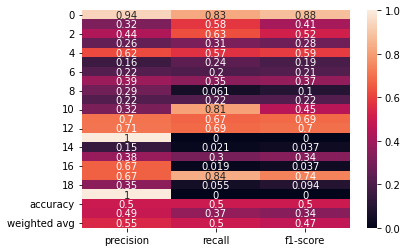

In [71]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
evaluation_report = classification_report(true_labels_ee, pred_label_ee, output_dict=True, zero_division=1)
sns.heatmap(pd.DataFrame(evaluation_report).iloc[:-1, :].T, annot=True)

In [72]:
print('The accuracy for fine-tune mDeberta using english train data on english test set is:',acc_ee,'%')

The accuracy for fine-tune mDeberta using english train data on english test set is: 50.28023032629559 %


In [77]:
acc_ee_3, pred_label_ee_3, true_labels_ee_3 = predicttestset_topk(model_mdeberta_eng, prediction_dataloader_eng_test, 3)

In [73]:
print(df_test_eng.Text.values[0])
print('The top 3 prediction for the above sentence are:',[10, 18,  7], 'and corresponding emojis are:','📷','📸','✨')

en Pelham Parkway
The top 3 prediction for the above sentence are: [10, 18, 7] and corresponding emojis are: 📷 📸 ✨


In [80]:
print('The top 3 accuracy for fine-tune english mDeberta on English test set is:',acc_ee_3,'%')

The top 3 accuracy for fine-tune english mDeberta on English test set is: 71.32549584133078 %


In [82]:
acc_ee_5, pred_label_ee_5, true_labels_ee_5 = predicttestset_topk(model_mdeberta_eng, prediction_dataloader_eng_test, 5)

In [ ]:
acc_ee_5_, pred_label_ee_5_, true_labels_ee_5_ = predicttestset_topk(model_mdeberta_eng, prediction_dataloader_eng_test, 5)

In [74]:
print(df_test_eng.Text.values[1])
print('The top 5 prediction for the above sentence are:',[10, 18,  7,  4, 15], 'and corresponding emojis are:','📷','📸','✨','🔥','💯')

en Pelham Parkway
The top 5 prediction for the above sentence are: [10, 18, 7, 4, 15] and corresponding emojis are: 📷 📸 ✨ 🔥 💯


In [84]:
print('The top 5 accuracy for fine-tune english mDeberta on English test set is:',acc_ee_5,'%')

The top 5 accuracy for fine-tune english mDeberta on English test set is: 80.53051823416507 %


** Preprocess spanish test and predict using fine-tuned english mdeberta**

In [44]:
import pandas as pd
df_test_span = pd.read_csv(filepath+'test/es_modifiedTestData1.csv')

In [45]:
prediction_dataloader_span_test = test_preprocessing(df_test_span.Text.values,df_test_span.Label.values,tokenizer_mdeberta,32,150)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  Buenos días desde Valencia en Comunidad Valenciana, Spain
Token IDs: tensor([     1,  26693,    264,    260,  15171,    260,   4401,    260, 134403,
           290,    260,  28243,    260, 143420,    263,    262,    260, 172563,
             2,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0, 

In [47]:
acc_es, pred_label_es, true_labels_es = predicttestset(model_mdeberta_eng,prediction_dataloader_span_test)

In [50]:
import pandas as pd
df_es = pd.DataFrame(list(zip(true_labels_es, pred_label_es)),
               columns =['TrueLabels', 'Prediction'])

In [81]:
df_es.to_csv(filepath+'es.csv')

In [86]:
df_es = pd.read_csv(filepath+'es.csv')

In [87]:
true_labels_es = df_es.TrueLabels.values
pred_label_es = df_es.Prediction.values

In [88]:
from sklearn.metrics import classification_report
emoji_list_es = ['❤', '😍', '😂', '💕', '🔥', '😊', '😎', '✨', '💙', '😘', '📷', '🇺🇸', '☀', '💜', '😉', '💯', '😁', '🎄', '📸', '😜','💪', '👌', '🇪🇸', '💞', '🎶', '💘']
final_repo = classification_report(true_labels_es, pred_label_es, zero_division=1,target_names=emoji_list_es)
print(final_repo)

              precision    recall  f1-score   support

           ❤       0.98      0.53      0.69      2141
           😍       0.32      0.52      0.40      1408
           😂       0.48      0.71      0.57      1499
           💕       0.10      0.20      0.13       352
           🔥       0.00      1.00      0.00         0
           😊       0.16      0.23      0.19       514
           😎       0.12      0.23      0.16       339
           ✨       0.22      0.28      0.25       416
           💙       0.31      0.06      0.10       413
           😘       0.25      0.24      0.24       397
           📷       0.00      1.00      0.00         0
          🇺🇸       0.00      1.00      0.00         0
           ☀       0.00      1.00      0.00         0
           💜       1.00      0.00      0.00       235
           😉       0.69      0.26      0.38       453
           💯       0.00      1.00      0.00         0
           😁       0.00      0.00      0.00       209
           🎄       0.00    

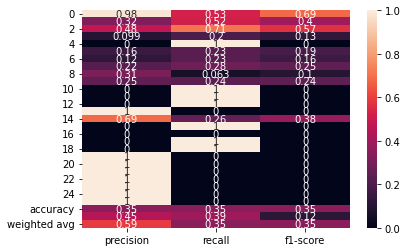

In [89]:
import pandas as pd
import seaborn as sns
evaluation_report = classification_report(true_labels_es, pred_label_es, output_dict=True, zero_division=1)
sns.heatmap(pd.DataFrame(evaluation_report).iloc[:-1, :].T, annot=True)

In [99]:
print('The accuracy for fine-tune mDeberta using english train data on spanish test set is:',acc_es,'%')

The accuracy for fine-tune mDeberta using english train data on spanish test set is: 35.48514376996805 %


In [95]:
acc_es_3, pred_label_es_3, true_labels_es_3 = predicttestset_topk(model_mdeberta_eng, prediction_dataloader_span_test, 3)

In [93]:
print(df_test_span.Text.values[0])
print('The top 3 prediction for the above sentence are:',[1, 9,  5], 'and corresponding emojis are:','😍','😘','😊')

Buenos días desde Valencia en Comunidad Valenciana, Spain
The top 3 prediction for the above sentence are: [1, 9, 5] and corresponding emojis are: 😍 😘 😊


In [102]:
print('The top 3 zero shot accuracy for fine-tune english mDeberta on Spanish test set is:',acc_es_3,'%')

The top 3 zero shot accuracy for fine-tune english mDeberta on Spanish test set is: 53.307907348242814 %


In [96]:
acc_es_5, pred_label_es_5, true_labels_es_5 = predicttestset_topk(model_mdeberta_eng, prediction_dataloader_span_test, 5)

In [103]:
print('The top 5 zero shot accuracy for fine-tune english mdeberta on Spanish test set is:',acc_es_5,'%')

The top 5 zero shot accuracy for fine-tune english mdeberta on Spanish test set is: 64.83865814696485 %


** fine tuning mDeberta on spanish training data**

In [ ]:
import pandas as pd
df_train_span = pd.read_csv(filepath+'train/crawler/data/spanish/es_modifiedTrainData.csv')

In [ ]:
df_train_span

,Unnamed: 0,Text,Label
0,0,Es imposible quererte más @ Plaza Del Callao -...,0
1,1,Disfrutando de buena comida con buena compañía...,5
2,2,Muchísimas Felicidades M!!! Nos vemos pronto! ...,8
3,3,Y pensar que a esta persona la conozco de hace...,8
4,4,¡Que buenas son las noches así y que buena com...,25
...,...,...,...
81160,81160,Cena en Madrid. Plan perfecto para descansar d...,1
81161,81161,Cuando este triste miraré esta batalla de gall...,2
81162,81162,@user cooooomoooo me hueeeeeleeeee a olviiiido...,9
81163,81163,Mi amor @ Bar Concha Velasco Almendralejo,0


In [ ]:
input_ids_train_span,attention_masks_train_span,labels_train_span = process_trainingdata(tokenizer_mdeberta,df_train_span.Text.values,df_train_span.Label.values)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  Es imposible quererte más @ Plaza Del Callao - Madrid 
Token IDs: tensor([    1,   656,   860, 12260,   260,  6106, 16981,  1281,  1251,   260,
        46823,   427,  8188,   263,   269,   260,   265, 35498,     2,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,  

In [ ]:
train_dataset_span,val_dataset_span = datasetsize(input_ids_train_span,attention_masks_train_span,labels_train_span)

73,048 training samples
8,117 validation samples


In [ ]:
train_dataloader_span, validation_dataloader_span = dataloader(32,train_dataset_span,val_dataset_span)

In [ ]:
from transformers import AutoConfig, AutoModelForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model_mdeberta_span = AutoModelForSequenceClassification.from_pretrained(
#model_mdeberta = DebertaV2ForSequenceClassification.from_pretrained(
    "microsoft/mdeberta-v3-base", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 26, # need to change to the number of label in test for zero-shot performance
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.

)

# Tell pytorch to run this model on the GPU.
model_mdeberta_span.cuda()

Downloading:   0%|          | 0.00/534M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/mdeberta-v3-base were not used when initializing DebertaV2ForSequenceClassification: ['lm_predictions.lm_head.dense.bias', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.LayerNorm.weight', 'lm_predictions.lm_head.dense.weight', 'mask_predictions.dense.weight', 'mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.classifier.bias', 'mask_predictions.dense.bias']
- This IS expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from 

DebertaV2ForSequenceClassification(
  (deberta): DebertaV2Model(
    (embeddings): DebertaV2Embeddings(
      (word_embeddings): Embedding(251000, 768, padding_idx=0)
      (LayerNorm): LayerNorm((768,), eps=1e-07, elementwise_affine=True)
      (dropout): StableDropout()
    )
    (encoder): DebertaV2Encoder(
      (layer): ModuleList(
        (0): DebertaV2Layer(
          (attention): DebertaV2Attention(
            (self): DisentangledSelfAttention(
              (query_proj): Linear(in_features=768, out_features=768, bias=True)
              (key_proj): Linear(in_features=768, out_features=768, bias=True)
              (value_proj): Linear(in_features=768, out_features=768, bias=True)
              (pos_dropout): StableDropout()
              (dropout): StableDropout()
            )
            (output): DebertaV2SelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-07, elementwise_affine=True)
 

In [ ]:
optimizer_mdeberta_span = optimizer(model_mdeberta_span)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
scheduler_mdeberta_span = scheduler(train_dataloader_span,optimizer_mdeberta_span)

In [ ]:
import random
import numpy as np

def modeltraining(model,train_dataloader,validation_dataloader,optimizer,scheduler):

  seed_val = 42

  random.seed(seed_val)
  np.random.seed(seed_val)
  torch.manual_seed(seed_val)
  torch.cuda.manual_seed_all(seed_val)

  training_stats = []

  total_t0 = time.time()
  epochs = 1

  #with torch.no_grad():
  for epoch_i in range(0, epochs):

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()

    total_train_loss = 0
    model.train()
    #print('reached here')

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):
        if step % 1000 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))
            torch.save(model,filepath+'model_mdeberta_span.pt')

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        #print(b_input_ids.size(),b_labels.size())

        model.zero_grad()        
        #print('reached 1')
        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        total_train_loss += loss.item()

        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()

        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    print("")
    print("Running Validation...")

    t0 = time.time()

    model.eval()

    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    for batch in validation_dataloader:        
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        with torch.no_grad():        
            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        loss = result.loss
        
        logits = result.logits
            
        total_eval_loss += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

  print("")
  print("Training complete!")

  print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))
  return model

In [ ]:
model_mdeberta_span = modeltraining(model_mdeberta_span,train_dataloader_span,validation_dataloader_span,optimizer_mdeberta_span,scheduler_mdeberta_span)


======== Epoch 1 / 1 ========
Training...
  Batch 1,000  of  2,282.    Elapsed: 0:10:38.
  Batch 2,000  of  2,282.    Elapsed: 0:21:20.

  Average training loss: 2.17
  Training epcoh took: 0:24:24

Running Validation...
  Accuracy: 0.34
  Validation Loss: 2.17
  Validation took: 0:00:49

Training complete!
Total training took 0:25:14 (h:mm:ss)


In [ ]:
torch.save(model_mdeberta_span,filepath+'model_mdeberta_span_final.pt')

**predict on test sets using spanish fine tuned mDeberta**

In [13]:
import torch
model_mdeberta_span = torch.load(filepath+'model_mdeberta_span_final.pt')

** predict on spanishh test set**

In [105]:
acc_span_ss, pred_label_ss, true_labels_ss = predicttestset(model_mdeberta_span,prediction_dataloader_span_test)

In [106]:
import pandas as pd
df_ss = pd.DataFrame(list(zip(true_labels_ss, pred_label_ss)),
               columns =['TrueLabels', 'Prediction'])

In [107]:
df_ss.to_csv(filepath+'ss.csv')

In [112]:
df_ss = pd.read_csv(filepath+'ss.csv')
true_labels_ss = df_ss.TrueLabels.values
pred_label_ss = df_ss.Prediction.values

In [113]:
from sklearn.metrics import classification_report
emoji_list_ss = ['❤', '😍', '😂', '💕', '😊', '😎', '✨', '💙', '😘', '💜', '😉', '😁','😜', '💪', '👌', '🇪🇸', '💞', '🎶', '💘']
final_repo = classification_report(true_labels_ss, pred_label_ss, zero_division=1,target_names=emoji_list_ss)
#final_repo = classification_report(true_labels_ss, pred_label_ss, zero_division=1)
print(final_repo)


              precision    recall  f1-score   support

           ❤       0.66      0.70      0.68      2141
           😍       0.29      0.61      0.39      1408
           😂       0.48      0.71      0.58      1499
           💕       0.51      0.10      0.17       352
           😊       0.12      0.15      0.13       514
           😎       1.00      0.00      0.00       339
           ✨       0.33      0.01      0.02       416
           💙       1.00      0.00      0.00       413
           😘       0.35      0.20      0.25       397
           💜       1.00      0.00      0.00       235
           😉       0.53      0.09      0.15       453
           😁       1.00      0.00      0.00       209
           😜       1.00      0.00      0.00       274
           💪       0.24      0.58      0.34       307
           👌       0.10      0.01      0.02       180
          🇪🇸       0.45      0.52      0.48       424
           💞       1.00      0.00      0.00        93
           🎶       0.15    

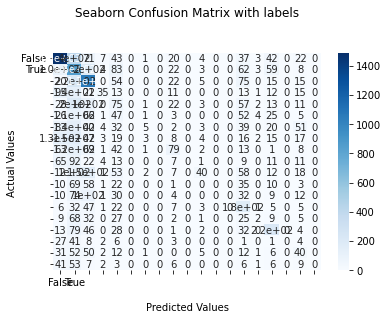

In [114]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cf_matrix = confusion_matrix(true_labels_ss, pred_label_ss)
#print(cf_matrix)


ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

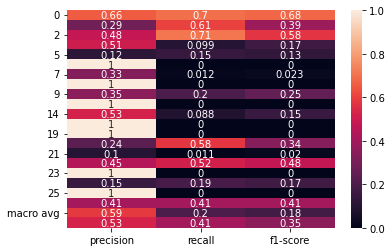

In [115]:
import pandas as pd
import seaborn as sns
evaluation_report = classification_report(true_labels_ss, pred_label_ss, output_dict=True, zero_division=1)
sns.heatmap(pd.DataFrame(evaluation_report).iloc[:-1, :].T, annot=True)

In [117]:
print('The accuracy for fine-tune mDeberta using spanish train data on spanish test set is:',acc_span_ss,'%')

The accuracy for fine-tune mDeberta using spanish train data on spanish test set is: 41.41597444089457 %


In [108]:
acc_span_apn_3, pred_label_ss_3, true_labels_ss_3 = predicttestset_topk(model_mdeberta_span, prediction_dataloader_span_test, 3)

In [5]:
print('The top 3 accuracy for fine-tune mDeberta using spanish train data on spanish test set is:',acc_span_apn_3,'%')

The top 3 accuracy for fine-tune mDeberta using spanish train data on spanish test set is: 61.24680511182109 %


In [110]:
acc_span_apn_5, pred_label_ss_5, true_labels_ss_5 = predicttestset_topk(model_mdeberta_span, prediction_dataloader_span_test, 5)

In [52]:
print(df_test_span.Text.values[2])
print('The top 5 prediction for the above sentence are:',[2, 14,  1, 19, 5], 'and corresponding emojis are:','😂','😉','😜','❤','😊')

Porfavor llevarlas a reciclar,necesitamos más papel para imprimir más propaganda
The top 5 prediction for the above sentence are: [2, 14, 1, 19, 5] and corresponding emojis are: 😂 😉 😜 ❤ 😊


In [6]:
print('The top 5 accuracy for fine-tune mDeberta using spanish train data on spanish test set is:',acc_span_apn_5,'%')

The top 5 accuracy for fine-tune mDeberta using spanish train data on spanish test set is: 72.15934504792332 %


**Predict on english dataset using spanish fine tuned**

In [35]:
acc_se, pred_label_se, true_labels_se= predicttestset(model_mdeberta_span,prediction_dataloader_eng_test)

In [119]:
import pandas as pd
df_se = pd.DataFrame(list(zip(true_labels_se, pred_label_se)),
               columns =['TrueLabels', 'Prediction'])

In [120]:
df_se.to_csv(filepath+'se.csv')

In [9]:
import pandas as pd
df_se = pd.read_csv(filepath+'se.csv')
true_labels_se = df_se.TrueLabels.values
pred_label_se = df_se.Prediction.values

In [10]:
from sklearn.metrics import classification_report
emoji_list_se = ['❤', '😍', '😂', '💕', '🔥', '😊', '😎', '✨', '💙', '😘', '📷', '🇺🇸', '☀', '💜', '😉', '💯', '😁', '🎄', '📸', '😜','💪', '👌', '🇪🇸', '🎶']
final_repo = classification_report(true_labels_se, pred_label_se, zero_division=1,target_names=emoji_list_se)
print(final_repo)

              precision    recall  f1-score   support

           ❤       0.63      0.88      0.74     10798
           😍       0.20      0.63      0.30      4830
           😂       0.30      0.61      0.41      4534
           💕       0.16      0.01      0.02      2605
           🔥       1.00      0.00      0.00      3716
           😊       0.06      0.15      0.08      1613
           😎       1.00      0.00      0.00      1996
           ✨       0.48      0.01      0.02      2749
           💙       1.00      0.00      0.00      1549
           😘       0.10      0.04      0.06      1175
           📷       1.00      0.00      0.00      1432
          🇺🇸       1.00      0.00      0.00      1949
           ☀       1.00      0.00      0.00      1265
           💜       1.00      0.00      0.00      1114
           😉       0.04      0.01      0.01      1306
           💯       1.00      0.00      0.00      1244
           😁       1.00      0.00      0.00      1153
           🎄       1.00    

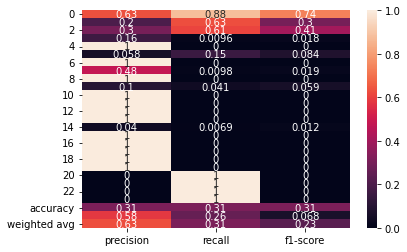

In [ ]:
import pandas as pd
import seaborn as sns
evaluation_report = classification_report(true_labels_se, pred_label_se, output_dict=True, zero_division=1)
sns.heatmap(pd.DataFrame(evaluation_report).iloc[:-1, :].T, annot=True)

In [39]:
print('The accuracy for fine-tune mDeberta using spanish train data on english test set is:',acc_se,'%')

The accuracy for fine-tune mDeberta using spanish train data on english test set is: 32.411948176583493 %


In [37]:
acc_span_se_3, pred_label_se_3, true_labels_se_3 = predicttestset_topk(model_mdeberta_span, prediction_dataloader_eng_test, 3)

In [40]:
print('The top 3 accuracy for fine-tune mDeberta using spanish train data on english test set is:',acc_span_se_3,'%')

The top 3 accuracy for fine-tune mDeberta using spanish train data on english test set is: 42.93058221369162 %
